In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pickle

## Study and Preprocess Dataset Part

In [2]:
# Adding some styles to plots
sns.set_style("whitegrid")
# Set the figure size
sns.set(rc={'figure.figsize': (20,16)})
# Set the color palette
custom_palette = ["#a1ff0a", "#ff0000", "#deff0a", "#0aefff", "#be0aff"]
sns.set_palette(custom_palette)
# Set the plots context
sns.set_context("talk", font_scale=0.5, rc={"grid.linewidth": 0.5})


In [3]:
# Loading the dataset
dataset = pd.read_csv("datasets/medical_insurance.csv")
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Find the number of sample
len(dataset)

2772

In [5]:
# Find the shape of the datset
dataset.shape

(2772, 7)

In [6]:
# Find the type of each column in the dataset
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Check for missing values in the dataset
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Find the number of duplicates in the datasset
dataset.duplicated().sum()

1435

In [9]:
# Find the number of unique values 
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
# Find the possible values for the smoker column
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
# Find the possible values for the sex column
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
# Find the possible values for region column
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
# Change String values to numbers, so we can work with them
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
# Use map to change region names to numbers
dataset['region'] = dataset['region'].map(region_mapping)

In [5]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,0,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,2,21984.47061
4,32,male,28.880,0,no,2,3866.85520
5,31,female,25.740,0,no,1,3756.62160
6,46,female,33.440,1,no,1,8240.58960
7,37,female,27.740,3,no,2,7281.50560
8,37,male,29.830,2,no,3,6406.41070
9,60,female,25.840,0,no,2,28923.13692


In [6]:
# Another method is to use sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
# 0 for female and 1 for male
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,0,16884.92400
1,18,1,33.770,1,no,1,1725.55230
2,28,1,33.000,3,no,1,4449.46200
3,33,1,22.705,0,no,2,21984.47061
4,32,1,28.880,0,no,2,3866.85520
5,31,0,25.740,0,no,1,3756.62160
6,46,0,33.440,1,no,1,8240.58960
7,37,0,27.740,3,no,2,7281.50560
8,37,1,29.830,2,no,3,6406.41070
9,60,0,25.840,0,no,2,28923.13692


In [7]:
# Change smoker string values to int
smoker_mapping = {'yes': 1, 'no': 0}
dataset['smoker'] = dataset['smoker'].map(smoker_mapping)
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [8]:
# Matrix of correlation
dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.000932,0.298624
sex,-0.026046,1.000000,0.042924,0.016020,0.082326,-0.004808,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,-0.159178,0.199846
children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.016111,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.006751,0.788783
region,-0.000932,-0.004808,-0.159178,-0.016111,0.006751,1.000000,0.013530
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.013530,1.000000


In [9]:
# scale charges values to thousands
dataset['charges'] = dataset['charges']/1000.0
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16.884924
1,18,1,33.770,1,0,1,1.725552
2,28,1,33.000,3,0,1,4.449462
3,33,1,22.705,0,0,2,21.984471
4,32,1,28.880,0,0,2,3.866855
5,31,0,25.740,0,0,1,3.756622
6,46,0,33.440,1,0,1,8.240590
7,37,0,27.740,3,0,2,7.281506
8,37,1,29.830,2,0,3,6.406411
9,60,0,25.840,0,0,2,28.923137


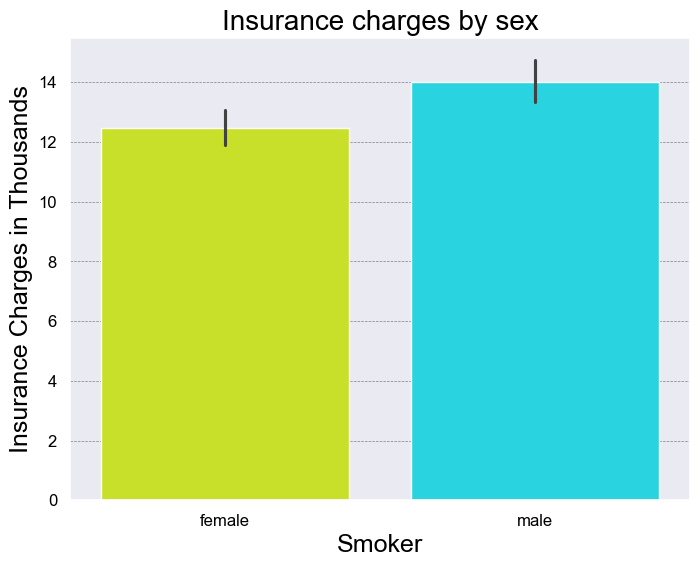

In [18]:
# Plot the charges by sex
plt.xlabel('Smoker', fontsize=18, color='black')
plt.ylabel('Insurance Charges in Thousands', fontsize=18, color='black')
plt.title('Insurance charges by sex', fontsize=20, color='black')
# Customize the tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
# Customize the grid color 
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Plot
# Define tick labels for the 'sex' column
sns.set(rc={'figure.figsize':(8,6)})
color_palette = ['#deff0a','#0aefff']
sex_labels = {0: 'female', 1: 'male'}
sns.barplot(x=dataset['sex'].map(sex_labels), y=dataset['charges'], hue=dataset['sex'].map(sex_labels),  palette=color_palette)
plt.show()

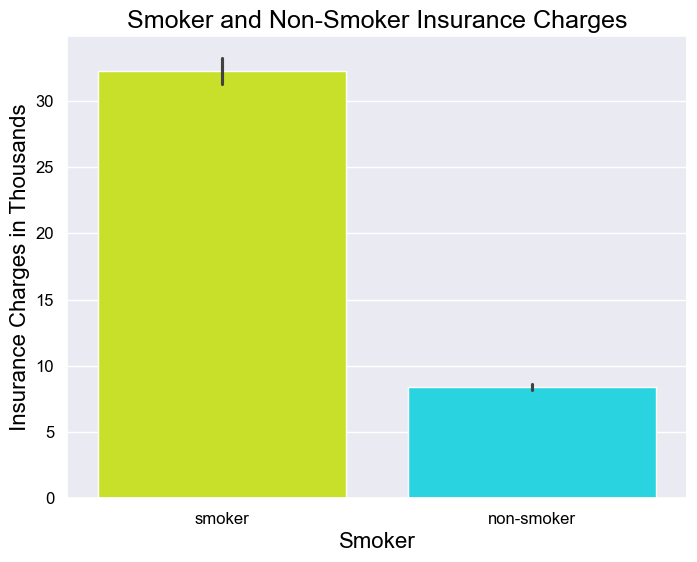

In [19]:
# Plot the smoker vs non-smoker insurance charges
plt.xlabel('Smoker',  fontsize=16, color='black')
plt.ylabel('Insurance Charges in Thousands', fontsize=16, color='black')
plt.title('Smoker and Non-Smoker Insurance Charges', fontsize=18, color='black')
# Customize the tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
# Plot 
# Define tick labels for the 'sex' column
sns.set(rc={'figure.figsize':(8,6)})
color_palette = ['#deff0a','#0aefff']
smoker_labels = {0: 'non-smoker', 1: 'smoker'}
sns.barplot(x=dataset['smoker'].map(smoker_labels), y=dataset['charges'], hue=dataset['smoker'].map(smoker_labels),  palette=color_palette)
plt.show()

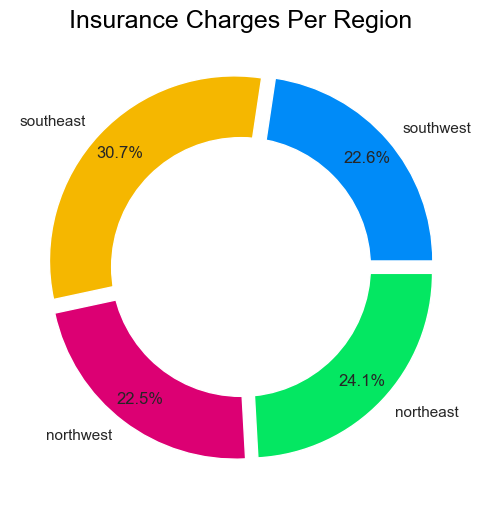

In [38]:
import matplotlib.pyplot as plt

# Setting labels for items in Chart
region_map = {0: 'southwest', 1: 'southeast', 2: 'northwest', 3: 'northeast'}

# Define colors
colors = ['#008bf8', '#f5b700', '#dc0073', '#04e762']

# Grouping dataset by region and summing charges
charges_per_region = dataset.groupby('region')['charges'].sum()

# Calculate explode based on the number of regions
explode = (0.05,) * len(charges_per_region)

# Pie Chart
plt.pie(charges_per_region, colors=colors, labels=region_map.values(),
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Insurance Charges Per Region', fontsize=18, color='black')

# Displaying Chart
plt.show()

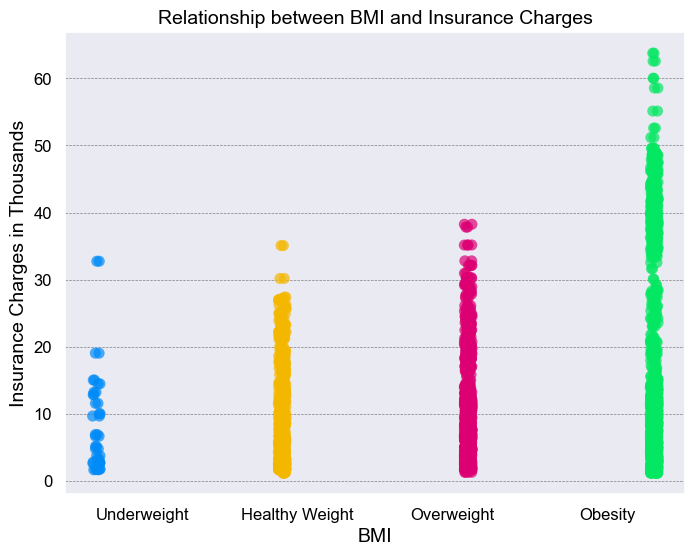

In [44]:
# Plot Relationship between bmi (body mass index) and insurance  charges
plt.xlabel("BMI", fontsize=14, color='black')
plt.ylabel("Insurance Charges in Thousands", fontsize=14, color='black')
plt.title("Relationship between BMI and Insurance Charges", fontsize=14, color='black')
# Customize the tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
colors = ['#008bf8', '#f5b700', '#dc0073', '#04e762']
# Customize the grid color
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# sort BMI into bins (intervals)
bmi_bins = pd.cut(dataset['bmi'], bins=[0,18.5,25,30, float('inf')], labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
sns.stripplot(x=bmi_bins, y=dataset["charges"], hue=bmi_bins, dodge=True, size=8, alpha=0.7, jitter=True, palette=colors)
plt.show()

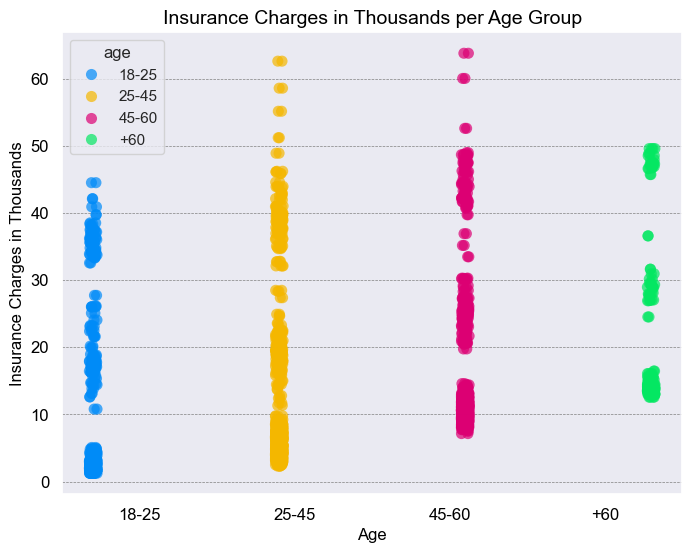

In [46]:
# Plot age and insurance charges relationship
plt.xlabel('Age', fontsize=12, color='black')
plt.ylabel('Insurance Charges in Thousands', fontsize=12, color='black')
plt.title('Insurance Charges in Thousands per Age Group', fontsize=14, color='black')
# Customize the tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
colors = ['#008bf8', '#f5b700', '#dc0073', '#04e762']
# Customize the grid color
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Sort Age into age bins
age_bins = pd.cut(dataset['age'], bins=[18,25,45,60,float('inf')], labels=['18-25', '25-45', '45-60', '+60'])
sns.stripplot(x=age_bins, y=dataset["charges"], hue=age_bins, dodge=True, size=8, alpha=0.7, jitter=True, palette=colors)
plt.show()

## Machine Learning Part

In [50]:
# Define Features
data = dataset[['age', 'bmi', 'smoker', 'charges']]
predict = "charges"
features = np.array(data.drop([predict], axis=1))
labels = np.array(data[predict])

In [51]:
features

array([[19.   , 27.9  ,  1.   ],
       [18.   , 33.77 ,  0.   ],
       [28.   , 33.   ,  0.   ],
       ...,
       [19.   , 26.03 ,  1.   ],
       [23.   , 18.715,  0.   ],
       [54.   , 31.6  ,  0.   ]])

In [49]:
labels

array([16.884924  ,  1.7255523 ,  4.449462  , ..., 16.4508947 ,
       21.59538229,  9.850432  ])

In [52]:
# Initialize lists to store training and test losses

In [56]:
train_losses = []
test_losses = []
best_accuracy = 0
for i in range(100):
        train_dataset, test_dataset, labels_train, labels_test= train_test_split(features, labels, test_size=0.1)
        model = linear_model.LinearRegression()
        model.fit(train_dataset, labels_train)
        
        # Compute training loss
        train_predictions = model.predict(train_dataset)
        train_loss = mean_squared_error(labels_train, train_predictions)
        train_losses.append(train_loss)
        
        # Compute test loss
        test_predictions = model.predict(test_dataset)
        test_loss = mean_squared_error(labels_test, test_predictions)
        test_losses.append(test_loss)
        
        # Compute accuracy
        accuracy = model.score(test_dataset, labels_test)
        print(f'Iteration: {i}\tAccuracy: {accuracy}\tTraining Loss: {train_loss}\tTesting Loss: {test_loss}')
        if accuracy > best_accuracy :
                best_accuracy = accuracy
                with open('charges_model.pickle', 'wb') as f:
                        pickle.dump(model,f)
                

Iteration: 0	Accuracy: 0.7916100138393433	Training Loss: 38.28855709686312	Testing Loss: 28.903438051206876
Iteration: 1	Accuracy: 0.7144072691406673	Training Loss: 37.073091004236915	Testing Loss: 39.840253614388836
Iteration: 2	Accuracy: 0.7360888977865943	Training Loss: 37.73158184461667	Testing Loss: 33.882784065785756
Iteration: 3	Accuracy: 0.7412733604398664	Training Loss: 37.03613818140894	Testing Loss: 40.14259527367333
Iteration: 4	Accuracy: 0.7352678365803852	Training Loss: 37.68489951608336	Testing Loss: 34.38731724164223
Iteration: 5	Accuracy: 0.7740639902277427	Training Loss: 37.73931974521244	Testing Loss: 33.813789843431636
Iteration: 6	Accuracy: 0.7942564005884726	Training Loss: 38.075249432513	Testing Loss: 30.80956109052636
Iteration: 7	Accuracy: 0.7347936833339672	Training Loss: 37.36481446023157	Testing Loss: 37.216644106975195
Iteration: 8	Accuracy: 0.7159331552686883	Training Loss: 35.94059114163693	Testing Loss: 50.00554879099913
Iteration: 9	Accuracy: 0.77698924

In [57]:
# Print the average training and test losses over all iterations
print(f"Average Training Loss: {sum(train_losses) / len(train_losses)}")
print(f"Average Test Loss: {sum(test_losses) / len(test_losses)}")

Average Training Loss: 37.42233562331678
Average Test Loss: 36.721902984443155


In [67]:
pickle_in = open("charges_model.pickle", "rb")
model = pickle.load(pickle_in)
train_dataset, test_dataset, labels_train, labels_test= train_test_split(features, labels, test_size=0.1, shuffle=True)
predictions = model.predict(test_dataset)


In [77]:
len(test_dataset[:,0])

278

In [80]:
# Display results in a Dataframe
results = pd.DataFrame({
        'age': test_dataset[:, 0],
        'smoker': test_dataset[:, 2],
        'BMI': test_dataset[:, 1],
        'Actual charges': labels_test,
        'Predicted charges': predictions
})
results['smoker'] = results['smoker'].map({1.0: 'Yes', 0.0: 'No'})
results.head(30)

,age,smoker,BMI,Actual charges,Predicted charges
0,46.0,No,26.620,7.742110,8.870965
1,45.0,No,30.495,8.413463,9.867958
2,35.0,No,35.860,5.836520,9.031307
3,58.0,No,28.215,12.224351,12.475194
4,60.0,No,24.320,13.112605,11.729054
5,60.0,No,25.740,12.142579,12.188702
6,34.0,No,26.410,5.385338,5.715054
7,54.0,No,23.000,12.094478,9.757809
8,39.0,No,31.920,7.209492,8.785257
9,31.0,No,38.390,4.463205,8.820946
